# Classification

## Scope and Objectives

### Scope

In this lab, I will build classification models to predict the value of a discrete dependent variable (known as the label), given a list of features and a true output.

### Objectives

After completing this lab, I will be able to:

1. Use the UCI machine Learning Repository to load data into Python

2. Perform exploratory data analysis on the dataset. Analysis aspects to pay attention to
    - What are the features' data types?
    - Are the features standardized -- do they have a mean of 0 and a standard deviation of 1?
    - Does the dataset have missing values?
    - Are the features correlated? Use pandas corr() method to compute and display the correlation matrix. You will also be able to use the Seaborn pairplot to analyze the multivariate relationship between each pair of features.
    - What is the shape of the dataset -- number of instances and number of features?

3. Split the dataset into training and test data subsets with a pre-defined ratio.

4. Standardize the datasets. The training dataset is used to fit the standardizer, followed by the standardization of the training and test datasets. The goal is to avoid data leakage.

5. Create and train perceptron, logistic regression, and XGBoost classifiers

6. Evaluate the performance of the classifiers using the following metrics:
    - Accuracy
    - Precision
    - Recall
    - F1-score
    - Confusion matrix


7. Compare the performance of the classifier models in terms of approximation (performance using the training dataset) and generalization (performance using the test dataset)

8. Provide general comparative remarks on the performance of the implemented classifiers.

In [35]:
!pip install ucimlrepo
!pip install mlxtend
!pip install xgboost

In [36]:
from ucimlrepo import fetch_ucirepo 
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

In [37]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
  
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 

In [38]:
#check the features information on this website
# https://archive.ics.uci.edu/dataset/222/bank+marketing

In [39]:
# display the number of rows (samples or instances) and number of features (columns)

# This prints (number of samples, number of features) for each data
X.shape, y.shape

((45211, 16), (45211, 1))

In [40]:
#ran X.info to distinguish between numerical and categorical data
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [41]:

#Running X.describe() prints the numeric data, added a label on top to highlight the numeric data table
print(" "*40+"Statistical Numeric Data")
print("-"*102)
X.describe()



                                        Statistical Numeric Data
------------------------------------------------------------------------------------------------------


,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [42]:
#Running X.describe(include='object') prints the categorical data, added a label on top to highlight the categorical data table
print(" "*30+"Statistical Categorical Data")
print("-"*88)
X.describe(include='object')

                              Statistical Categorical Data
----------------------------------------------------------------------------------------


,job,marital,education,default,housing,loan,contact,month,poutcome
count,44923,45211,43354,45211,45211,45211,32191,45211,8252
unique,11,3,3,2,2,2,2,12,3
top,blue-collar,married,secondary,no,yes,no,cellular,may,failure
freq,9732,27214,23202,44396,25130,37967,29285,13766,4901


In [43]:
# extracting the following columns of X and store the extracted columns as a dataframe named data
# columns to be extracted: age, balance, duration, campaign, pdays, previous

data = X[['age', 'balance','duration','campaign','pdays','previous']].copy(deep=True)

In [44]:
# using the methods info() and describe() to better understand the data dataframe
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   balance   45211 non-null  int64
 2   duration  45211 non-null  int64
 3   campaign  45211 non-null  int64
 4   pdays     45211 non-null  int64
 5   previous  45211 non-null  int64
dtypes: int64(6)
memory usage: 2.1 MB


,age,balance,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,4918.000000,63.000000,871.000000,275.000000


In [45]:
# The features are not standardized as the mean is much higher than 0 and the std is a lot higher than 1, so I will need to standardize them.

In [46]:
#Displaying the correlation matrix of the dataframe data
# use the method corr(), refer for previous labs for details
# Calling the .corr function to display the correlation matrix for the features matrix 
(pd.DataFrame(data)
 .corr()
 .style
 .background_gradient(cmap='PRGn', vmin=-1, vmax=1)
 )

,age,balance,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.021560,-0.014578,0.003435,0.016674
duration,-0.004648,0.021560,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,0.001203,-0.032855,0.454820,1.000000


In [47]:
# Which pair of columns are the most correlated? What is the correlation factor between them?t
# The most correlated pair of columns are 'pdays' and 'previous' with a correlation factor of approximately 0.4548

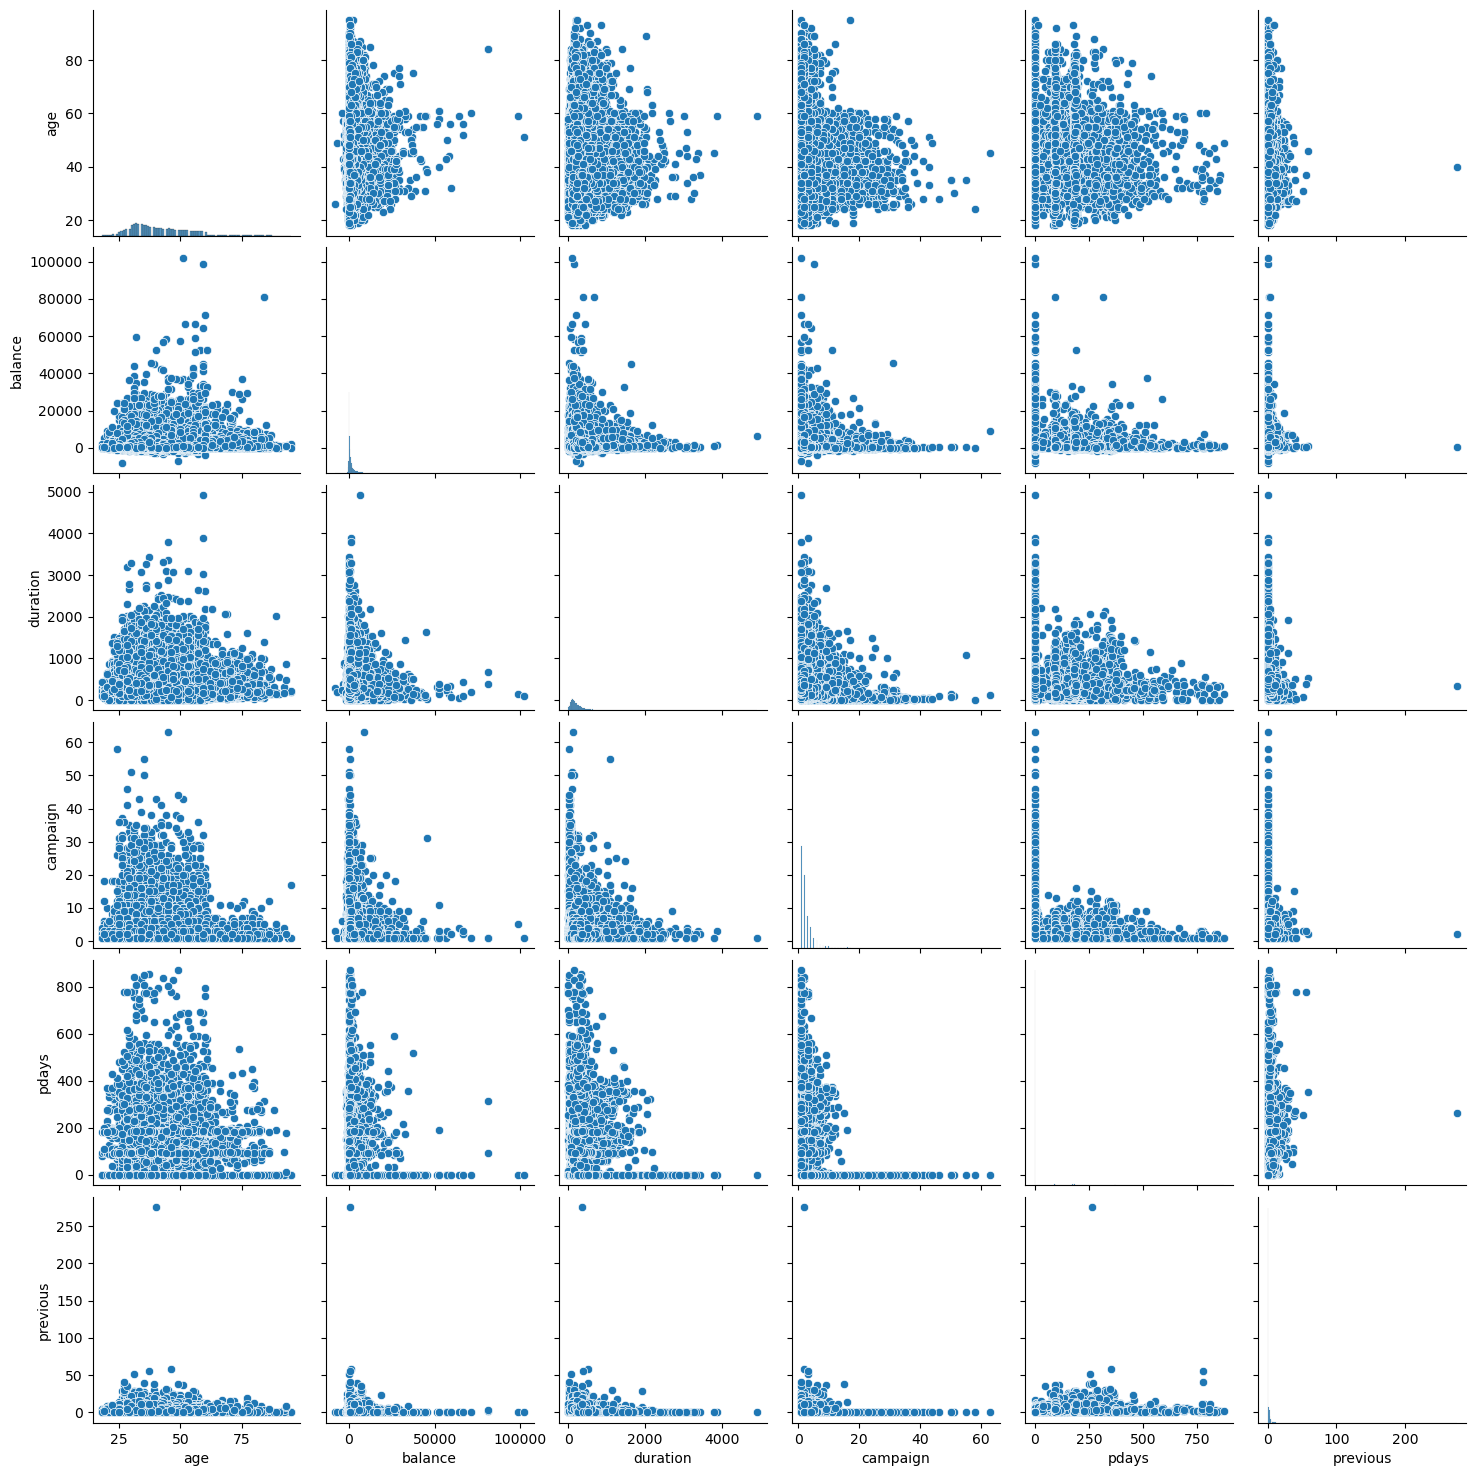

In [48]:
# use the seaborn library to plot a pairplot of the dataframe
# comment on the obtained results
sns.pairplot(data, kind="scatter")


In [49]:
# convert y into a numpy 1-dimensional array named target 
# * use the methods to_numpy() and squeeze()
# * check target's unique values and corresponding frequencies
# * check the shape of the resulting variable target
target= y.to_numpy().squeeze()
print(np.unique(target, return_counts=True))
print(target.shape)


(array(['no', 'yes'], dtype=object), array([39922,  5289]))
(45211,)


In [50]:
# the values in target are non-numeric
# convert them into numeric labels (0 and 1)
# use the np.where() method
target=np.where(target=='no',0,1)

In [51]:
# verify that target includes numeric values and display their frequencies
# comment on the balance of the labels 
# The target now contains numeric values [0, 1].
# The frequency has not changed, confirming that all samples were successfully converted.
# There are 39,922 samples labeled as 0 and 5,289 samples labeled as 1, we do have significantly more 0s than 1s
print(np.unique(target, return_counts=True))


(array([0, 1]), array([39922,  5289]))


In [52]:
# split the dataset (data, target) into training and test datasets
# the test dataset is 15% of the whole dataset.
# Use the stratify argument (explain why it should be used.)
# Display the sizes of the resulting four variables

# I used stratify as it keeps class proportions are the same or similar 
# since we have a significantly higher number of 0s and so this prevents bias
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.15, random_state=1408,stratify=target) 

#Printing the result of each of the four variables
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


X_train shape: (38429, 6)
X_test shape: (6782, 6)
y_train shape: (38429,)
y_test shape: (6782,)


In [53]:
# create a standardizing object (make the mean=0 and variance=1)
# Note that the output of the used methods is a numpy array
##### Important Note: Use the X_train to fit the standardizing object
##### The use the resulting object to transform X_test and X_train
#### You can use the methods fit() and transform()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [54]:
# verify that X_train is standardized.
# X_train is standardized as the mean is 0 and the std is 1
pd.DataFrame(X_train).describe()


,0,1,2,3,4,5
count,3.842900e+04,3.842900e+04,3.842900e+04,3.842900e+04,3.842900e+04,3.842900e+04
mean,2.520153e-16,4.067746e-18,-9.466754e-17,3.402115e-17,2.107832e-17,-3.697951e-18
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-2.159976e+00,-3.043185e+00,-1.002367e+00,-5.657778e-01,-4.112539e-01,-2.986017e-01
25%,-7.452890e-01,-4.202881e-01,-6.020615e-01,-5.657778e-01,-4.112539e-01,-2.986017e-01
50%,-1.794143e-01,-2.980894e-01,-3.028042e-01,-2.454213e-01,-4.112539e-01,-2.986017e-01
75%,6.693978e-01,2.021070e-02,2.335271e-01,7.493520e-02,-4.112539e-01,-2.986017e-01
max,5.102083e+00,3.265893e+01,1.811124e+01,1.929633e+01,8.294591e+00,2.980988e+01


In [ ]:
# are all the features in X_test standardized?
pd.DataFrame(X_test).describe()
# JUSTIFICATION:
# The features in X_test are approximately standardized, with means close to 0 and stds close to 1.
# The small deviations are expected because the StandardScaler was fitted on X_train only
# and X_test was transformed using those same scaling parameters.
# This confirms that the standardization process was correctly applied

,0,1,2,3,4,5
count,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000,6782.000000
mean,0.021295,-0.015936,0.006489,-0.004800,0.000371,0.017672
std,1.009646,0.909081,1.005776,0.948666,0.997745,1.966035
min,-2.065663,-1.131763,-0.986821,-0.565778,-0.411254,-0.298602
25%,-0.745289,-0.421909,-0.598175,-0.565778,-0.411254,-0.298602
50%,-0.179414,-0.300845,-0.295031,-0.245421,-0.411254,-0.298602
75%,0.763710,0.008542,0.249073,0.074935,-0.411254,-0.298602
max,4.536208,20.411837,13.707879,10.967057,8.124867,142.457140


In [56]:
# create a Perceptron classifier
# the default number of iterations is 1,000
# eta0: learning rate (0.001)
perceptron = Perceptron(eta0=0.001, random_state=1)

# train the model using the training dataset

perceptron.fit(X_train, y_train)
# Predict the labels for the test dataset
pred = perceptron.predict(X_test)

# compute the accuracy, f1_score, precision, and recall
acc_perc = accuracy_score(y_test, pred)
f1score_perc = f1_score(y_test, pred, pos_label=0)
precision_perc = precision_score(y_test, pred, pos_label=0)
recall_perc = recall_score(y_test, pred, pos_label=0)


# display the computed measures above
print('Perceptron Model')
print('-'*20)
print('Accuracy: {:.3f}'.format(acc_perc))
print('Precision: {:.3f}'.format(precision_perc))
print('Recall: {:.3f}'.format(recall_perc))
print('F1-score: {:.3f}'.format(f1score_perc))

Perceptron Model
--------------------
Accuracy: 0.681
Precision: 0.869
Recall: 0.752
F1-score: 0.806


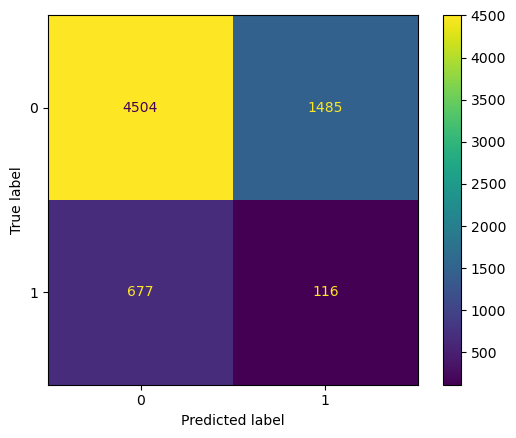

In [57]:
# display the confusion matrix

ConfusionMatrixDisplay.from_estimator(perceptron, X_test, y_test)

In [58]:
# I will do the same using LogisticRegression Classifier
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the labels for the test dataset
pred = lr.predict(X_test)

# compute the accuracy, f1_score, precision, and recall
acc_lr = accuracy_score(y_test, pred)
f1score_lr = f1_score(y_test, pred, pos_label=0)
precision_lr = precision_score(y_test, pred, pos_label=0)
recall_lr = recall_score(y_test, pred, pos_label=0)
# display the computed measures above
print('Logistic Regression Model')
print('-'*25)
print('Accuracy: {:.3f}'.format(acc_lr))
print('Precision: {:.3f}'.format(precision_lr))
print('Recall: {:.3f}'.format(recall_lr))
print('F1-score: {:.3f}'.format(f1score_lr))

Logistic Regression Model
-------------------------
Accuracy: 0.889
Precision: 0.900
Recall: 0.984
F1-score: 0.940


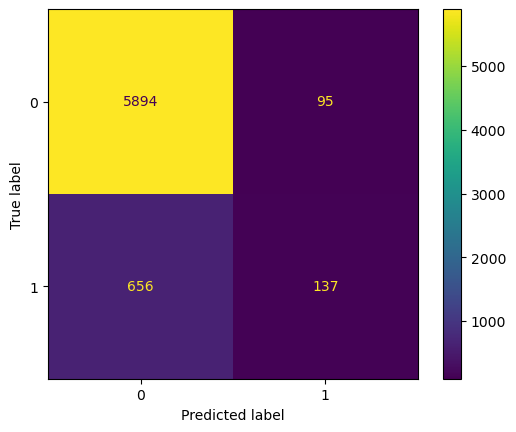

In [59]:
# display the confusion matrix
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)


In [60]:
# Do the same using XGBoost Classifier
# set the number of estimators to 150
#Setting the number of estimator to 150, and calling the XGboost classifier
xgboost_classifier = XGBClassifier(n_estimators=150)
# fit the classifier using the training dataset
xgboost_classifier.fit(X_train, y_train, verbose=False)
# make predictions using X_test
pred = xgboost_classifier.predict(X_test)

# compute the measures
acc_xgboost1 = accuracy_score(y_test, pred)
f1score_xgboost1 = f1_score(y_test, pred, pos_label=0)
precision_xgboost1 = precision_score(y_test, pred, pos_label=0)
recall_xgboost1 = recall_score(y_test, pred, pos_label=0)

# display the measures

print('-'*25)
print('XGBoost Model: 4 features')
print('-'*25)
print('Accuracy: {:.3f}'.format(acc_xgboost1))
print('Precision: {:.3f}'.format(precision_xgboost1))
print('Recall: {:.3f}'.format(recall_xgboost1))
print('F1-score: {:.3f}'.format(f1score_xgboost1))

-------------------------
XGBoost Model: 4 features
-------------------------
Accuracy: 0.891
Precision: 0.918
Recall: 0.963
F1-score: 0.940


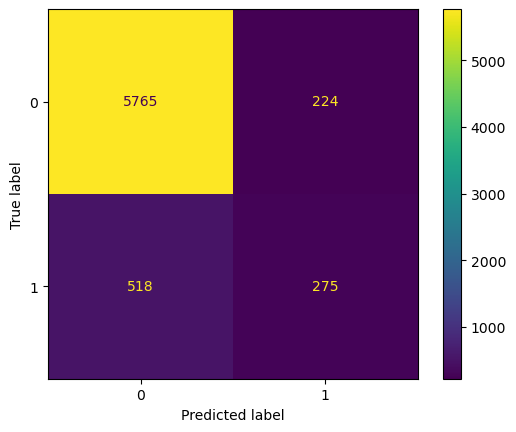

In [61]:
# display the confusion matrix
ConfusionMatrixDisplay.from_estimator(xgboost_classifier, X_test, y_test)

##### Based on the evaluation results, the Perceptron clearly performs the worst among the three classifiers, with much lower accuracy (0.681) and F1-score (0.806). This suggests that the Perceptron is unable to effectively separate the classes in this dataset, likely because the bank marketing classification problem involves more complex relationships that a simple linear model does not capture well. For this reason, the Perceptron is not an appropriate choice for this task.

##### Logistic Regression and XGBoost, however, both perform very well on this dataset, achieving nearly identical accuracy (0.889–0.891) and the same F1-score (0.940). The difference between them lies in how they balance precision and recall. XGBoost shows slightly higher precision, meaning it makes fewer incorrect classifications when predicting the majority class, while Logistic Regression achieves higher recall, meaning it detects more of the samples labeled as the positive class in our evaluation. Because the dataset is imbalanced and interpretability is often valuable in a banking environment, the best model depends on the goal. XGBoost may be preferred if the objective is pure predictive performance and reducing false positives, while Logistic Regression may be the better choice if transparency and reducing false negatives are more important. In summary, there is no single universal winner — both Logistic Regression and XGBoost generalize well, and the best choice depends on what matters more to the decision-makers using the model.